<h2>In this notebook we will explore two major kind of Transformation:</h2>
<ol>
    <li><h3>Feature Scaling:</h3>To transform different ranges of data into same scale</li>
    <li><h3>Gaussian Transformation</h3>To transform the data into normal distribution as far as possible</li>
</ol>
We will use so called Titanic dataset for all the transformation. After transformation we will use Logistic Regression to predict, also find out the accuracy and finally depict kde plot to show the changes after transformation.
<h4>Here we will use:</h4>
<ul>
    <li>Model : LogisticRegression (Scikit-Learn)</li>
    <li>Accuracy : Cross_val_Score (Scikit-Learn)</li>
    <li>Plot : kdeplot (Seaborn)</li>
</ul>
<h4>NB:</h4> In this notebook our aim is not to make the most accurate prediction, but to explore all the types of feature transformation.


In [1]:
import pandas as pd
import numpy as np
# to avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv', usecols=['Survived', 'Pclass', 'Age', 'Fare'])

In [3]:
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
# filling the null value with median value
data.Age.fillna(data.Age.median(), inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.Survived,test_size=0.3,random_state=30)

In [7]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(623, 3) (268, 3) (623,) (268,)


<h2>First, we will fit the model and find out the accuracy without transformation</h2>

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [9]:
normal_accuracy = cross_val_score(LogisticRegression(), x_train, y_train, cv=10, scoring='accuracy').mean()
print(f"Accuracy without Transformation is : {normal_accuracy} ")

Accuracy without Transformation is : 0.7110087045570916 


In [10]:
# As, every time we will use Logistic Regression and find out the accuracy after transformation.
# therefore, I created this function, so that we don't have to do this again and again, rather we will call this function.
# It will receive the transformed array as input and uisng the model find out the accuracy.
def fitmodel_findaccuracy(x_train_pt):
    normal_accuracy = cross_val_score(LogisticRegression(), x_train, y_train, cv=10, scoring='accuracy').mean()
    accuracy = cross_val_score(LogisticRegression(), x_train_pt, y_train, cv=10, scoring='accuracy').mean()
    print(f"Accuracy after transformation is : {accuracy}")
    print(f"Accuracy Improved by : {np.round((accuracy-normal_accuracy)*100, 2)} percent")

# Feature Scaling 
<html>
    <h3>Reason:</h3>
    To make different ranges of data into same scale. For instance, in your data there is a column of age and a column of Salary. The problem is, ages are ranged [10,90], whilst salarys are ranged [25k, 100k]. Therefore when you using some model to predict the salary will dominant to age column. That's why you need to scale them into same range without changing their spread as far as possible. Some Algorithm like, KNN (K-Nearest Neighbours), Neural Networks, Linear Regression, and Logistic Regression are required feature scaling
    <h3>We will discuss Three type of Feature Transformation:</h3><br>
    <ol>
        <li>Standard Scaling</li>
        <li>Min Max Scaling</li>
        <li>Robust Scaling</li>
    </ol>
 </html>

# Standard Scaling

<h2>Transformation Formula : (X-X.mean)/X.sd. </h2>
<h3>Effect : Mean will become 0 , Standard Deviation will become 1. </h3>


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()

In [13]:
x_train_ss = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [15]:
fitmodel_findaccuracy(x_train_ss)

Accuracy after transformation is : 0.7110087045570916
Accuracy Improved by : 0.0 percent


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data_scaled = ss.transform(data.iloc[:,1:])

In [18]:
def ploting(data_scaled, trans_method):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(data.iloc[:,1], label=data.columns[1])
    sns.kdeplot(data.iloc[:,2], label=data.columns[2])
    sns.kdeplot(data.iloc[:,3], label=data.columns[3])
    plt.legend()
    plt.title(f"Before {trans_method} Transformation")
    plt.subplot(122)
    sns.kdeplot(data_scaled[:,0], label=data.columns[1])
    sns.kdeplot(data_scaled[:,1], label=data.columns[2])
    sns.kdeplot(data_scaled[:,2], label=data.columns[3])
    plt.legend()
    plt.title(f"After {trans_method} Transformation")

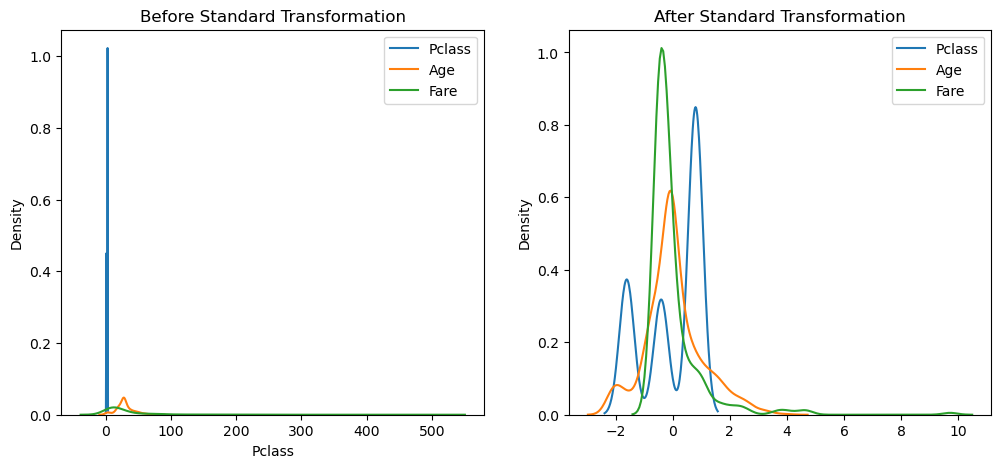

In [19]:
ploting(data_scaled, 'Standard')

# Min Max Scaling (Normalization):
<h2>Transformation Formula : (X-X.min)/(X.max-X.min).</h2>
<h3>Effect : value spread will become [0, 1] by default. and you can change this by giving feature_range=(a,b).</h3>

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms = MinMaxScaler()
# You can change the value range by : mms = MinMaxScaler(feature_range=(a, b))

In [22]:
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

In [23]:
fitmodel_findaccuracy(x_train_mms)

Accuracy after transformation is : 0.7174859190988223
Accuracy Improved by : 0.65 percent


In [24]:
data_mms = mms.transform(data.iloc[:,1:])

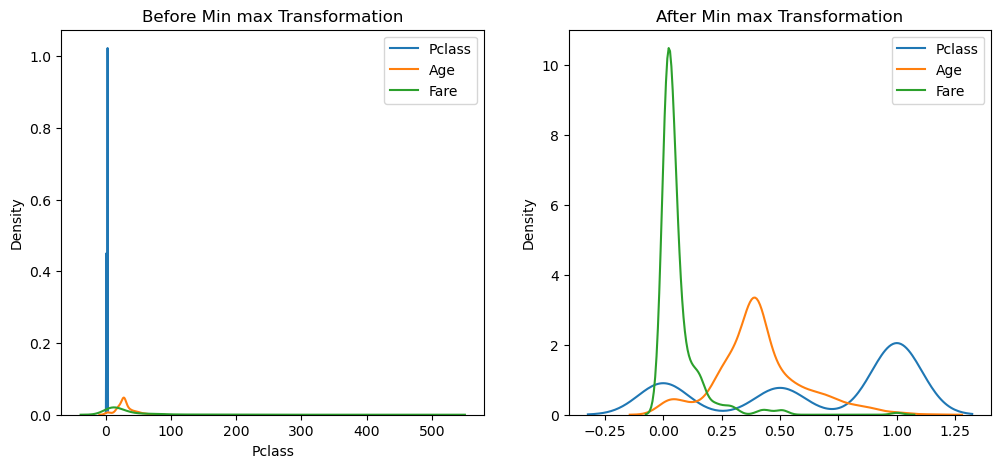

In [25]:
ploting(data_mms, 'Min max')

In [26]:
data.Age.quantile(0.75)-data.Age.quantile(0.25)

13.0

# Robust Scaling
<h2>Transformation Formula : (X-X.median)/IQR</h2>
<h3>IQR (Inter Quantile Range) = quantile(0.75) - quantile(0.25)</h3>

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
rs = RobustScaler()

In [29]:
x_train_rs = rs.fit_transform(x_train)
x_test_rs = rs.transform(x_test)

In [30]:
fitmodel_findaccuracy(x_train_rs)

Accuracy after transformation is : 0.7110087045570916
Accuracy Improved by : 0.0 percent


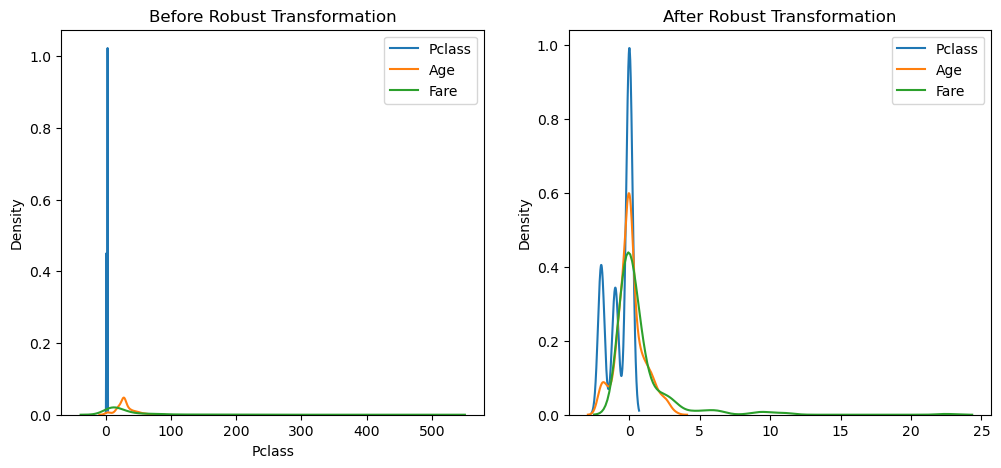

In [31]:
ploting(x_train_rs, 'Robust')

# Gaussian Transformation 

<html>
    <h3>Reason : To make the data Normally distributed as far as possible.</h3>
    <h3>There are two types of Gaussian Transformation</h3><br>
    <ol>
        <li><h4>Function Transformation</h4></li>
        <ul>
            <li>Logarithmic Transformation</li>
            <li>Square Transformation</li>
            <li>Square Root Transformation</li>
            <li>Reciprocal Transformation</li>
            <li>Exponential Transformation</li>
            <li>Random Function Transformation</li><br>
        </ul>
        <li><h4>Power Transformation</h4></li>
        <ul>
            <li>Yeo-Johnson Transformation</li>
            <li>Box-Cox Transrformation</li>
        </ul>
    </ol>
    <h4>Before that you have to check whether the data is normally distributed or skewed. You can check it in three ways:</h4>
    <ul>
        <li>Kde plot</li>
        <li>pd.skew()</li>
        <li>QQ Plot (Probplot)</li>
    </ul>
</html>


In [32]:
import seaborn as sns
from scipy import stats

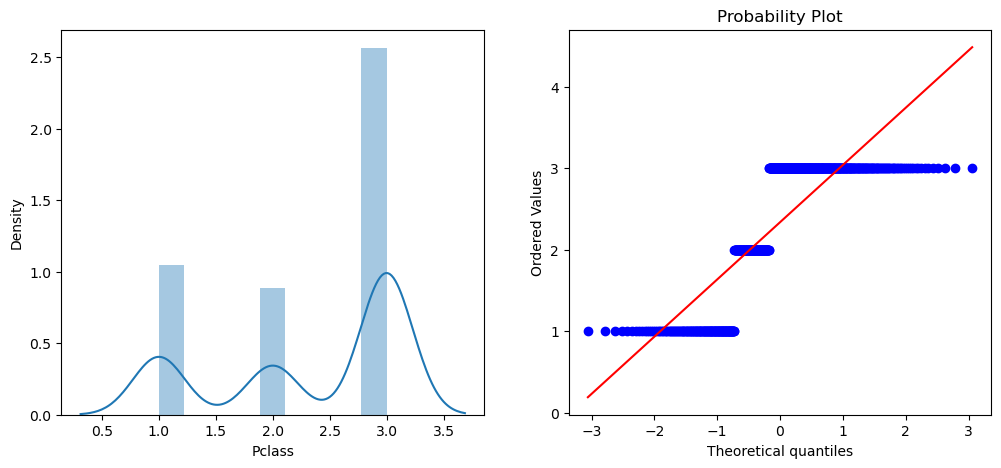

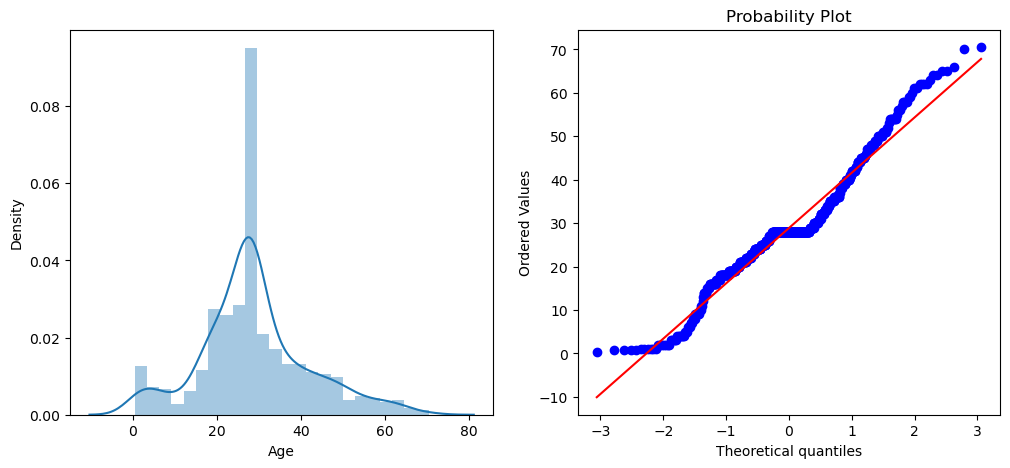

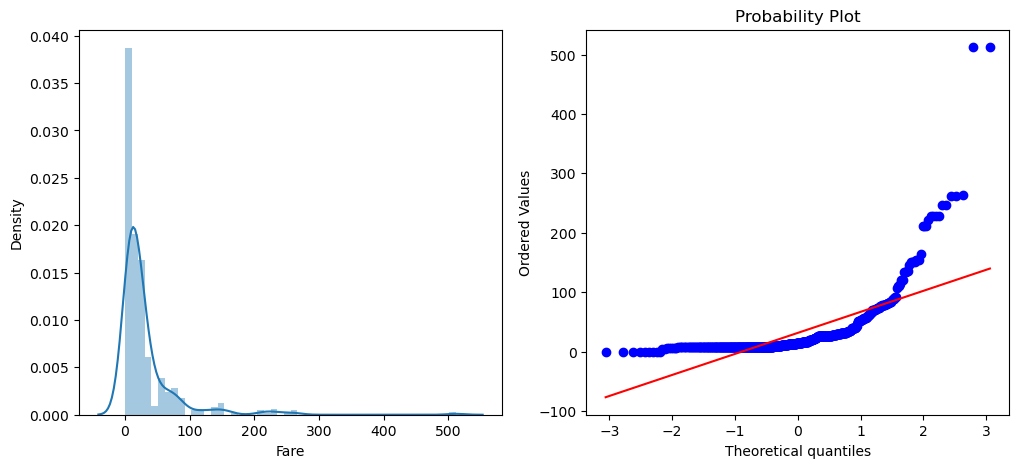

In [33]:
# To test normal distribution by distribution plot and probplot.
for i in x_train:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.distplot(x_train[i])
    plt.subplot(122)
    stats.probplot(x_train[i], plot=plt)
plt.show()


<h2>Function Transformation</h2>

In [34]:
from sklearn.preprocessing import FunctionTransformer

In [35]:
# As we have to run different functions in this method, so I have created a function for this transformation.
# You have to give a function as input.
# Inside this I also call the fitmodel_findaccuracy() funtion, so it wil fit model and find the accuracy.
# It will return the transformed array, that we can use it for ploting
def function_transformer(func):
    ft = FunctionTransformer(func)
    x_train_ft = ft.fit_transform(x_train)
    fitmodel_findaccuracy(x_train_ft)
    return x_train_ft

In [36]:
# Square Transformation
x_train_ft = function_transformer(np.square)

Accuracy after transformation is : 0.6757552483358935
Accuracy Improved by : -3.53 percent


In [37]:
# Square Root Transformation
x_train_ft = function_transformer(np.sqrt)

Accuracy after transformation is : 0.7078341013824885
Accuracy Improved by : -0.32 percent


In [38]:
# Logarithmic Transformation
x_train_ft = function_transformer(np.log1p)

Accuracy after transformation is : 0.7046338965693805
Accuracy Improved by : -0.64 percent


In [39]:
# Exponential Transformation
x_train_ft = function_transformer(np.exp)

Accuracy after transformation is : 0.6244239631336406
Accuracy Improved by : -8.66 percent


In [40]:
# Reciprocal Trans
x_train_ft = function_transformer(lambda x:1/(x+0.01))

Accuracy after transformation is : 0.7079109062980031
Accuracy Improved by : -0.31 percent


In [41]:
# Exponential Transformation
x_train_ft = function_transformer(np.exp)

Accuracy after transformation is : 0.6244239631336406
Accuracy Improved by : -8.66 percent


In [42]:
from sklearn.preprocessing import PowerTransformer

<h3>Yeo-Johnson Transformation</h3>
Both for positive and negetive values

In [43]:
pt = PowerTransformer()

In [44]:
x_train_pt = pt.fit_transform(x_train)

In [45]:
fitmodel_findaccuracy(x_train_pt)

Accuracy after transformation is : 0.7109831029185868
Accuracy Improved by : -0.0 percent


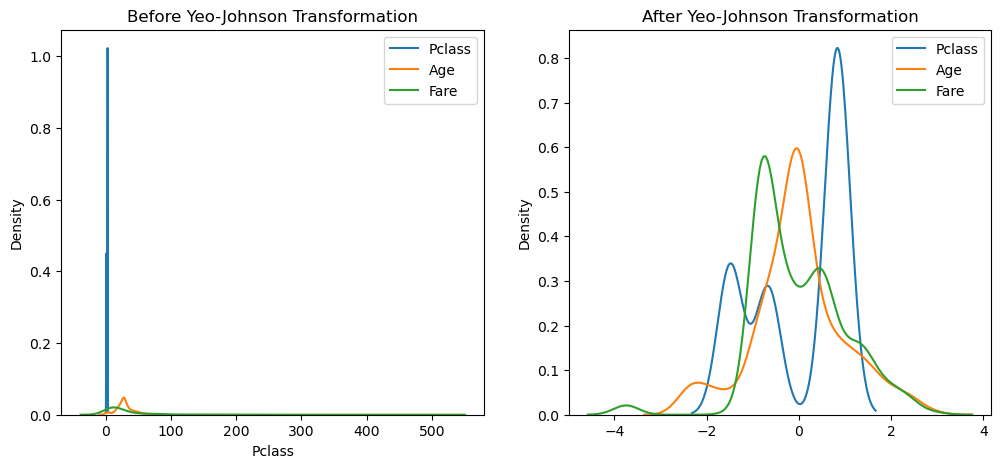

In [46]:
ploting(x_train_pt, 'Yeo-Johnson')

<h3>Box-Cox Transformation</h3>
Only for positive(x>0) values

In [47]:
# To check whether there are negetive or zero values
x_train.describe()

,Pclass,Age,Fare
count,623.000000,623.000000,623.000000
mean,2.337079,28.872392,31.499739
std,0.830695,12.966931,49.566430
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.895800
50%,3.000000,28.000000,14.454200
75%,3.000000,35.000000,30.035400
max,3.000000,70.500000,512.329200


In [48]:
pt = PowerTransformer(method='box-cox')

In [49]:
# There is no negetive value, but in 'Fare' column, the minimum value is 0. so I have added  0.0001.
x_train_pt = pt.fit_transform(x_train+0.001)

In [50]:
fitmodel_findaccuracy(x_train_pt)

Accuracy after transformation is : 0.7125960061443932
Accuracy Improved by : 0.16 percent


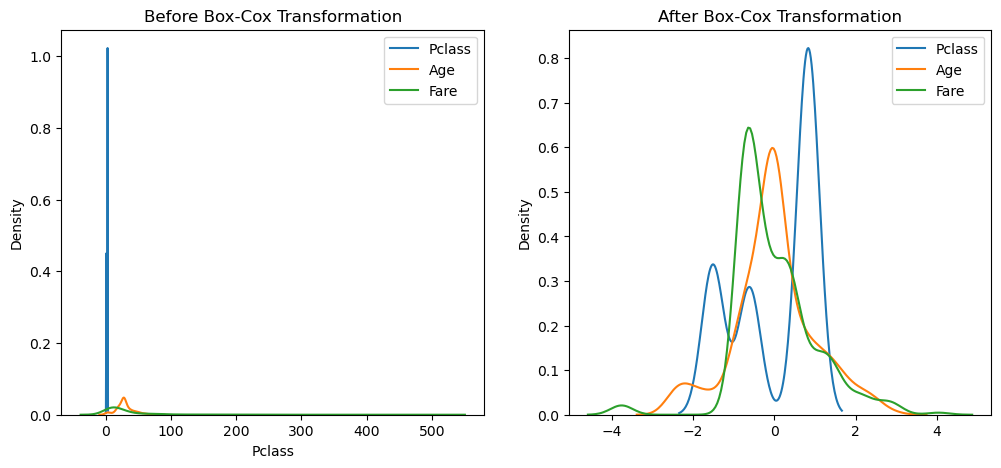

In [51]:
ploting(x_train_pt, 'Box-Cox')